<a href="https://colab.research.google.com/github/Wondav/Wonedav/blob/main/Kaggle_House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 
from pandas_profiling import ProfileReport

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')

In [ ]:
data.shape

(1460, 81)

In [ ]:
Null=pd.DataFrame(np.array(data.isnull().sum()),columns=["Null"])
Null['Features']=data.columns

In [ ]:
data.drop(Null[Null['Null']>(0.15*data.shape[0])]['Features'],axis=1,inplace=True)

In [ ]:
Null=pd.DataFrame(np.array(data.isnull().sum()),columns=["Null"])
Null['Features']=data.columns
Null[Null['Null']>0]

,Null,Features
23,8,MasVnrType
24,8,MasVnrArea
28,37,BsmtQual
29,37,BsmtCond
30,38,BsmtExposure
31,37,BsmtFinType1
33,38,BsmtFinType2
40,1,Electrical
55,81,GarageType
56,81,GarageYrBlt


In [ ]:
data.corr()['SalePrice']

Id              -0.021917
MSSubClass      -0.084284
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePrice, dtype: float64

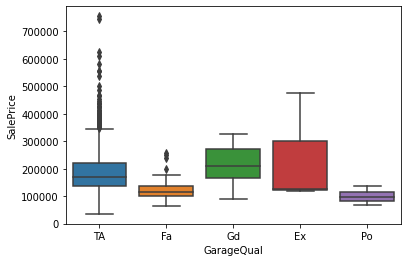

In [ ]:
sns.boxplot(x='GarageQual',y='SalePrice',data=data)

In [ ]:
data.drop(data[data['GarageType'].isnull()].index,axis=0,inplace=True)
Null=pd.DataFrame(np.array(data.isnull().sum()),columns=["Null"])
Null['Features']=data.columns
Null[Null['Null']>0]

,Null,Features
23,8,MasVnrType
24,8,MasVnrArea
28,30,BsmtQual
29,30,BsmtCond
30,31,BsmtExposure
31,30,BsmtFinType1
33,31,BsmtFinType2
40,1,Electrical


In [ ]:
data.drop(data[data['Electrical'].isnull()].index,axis=0,inplace=True)

In [ ]:
data['BsmtQual']=data['BsmtQual'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})
data['BsmtFinType1']=data['BsmtFinType1'].map({'GLQ':5,'ALQ':4,'BLQ':3,'Rec':2,'LwQ':1,'Unf':0})
data['BsmtFinType2']=data['BsmtFinType2'].map({'GLQ':5,'ALQ':4,'BLQ':3,'Rec':2,'LwQ':1,'Unf':0})

In [ ]:
data.corr()[['SalePrice','BsmtFinType1']]

,SalePrice,BsmtFinType1
Id,-0.027406,-0.010856
MSSubClass,-0.077622,0.037434
LotArea,0.252911,0.048084
OverallQual,0.787319,0.174585
OverallCond,-0.095378,-0.040424
YearBuilt,0.508013,0.330242
YearRemodAdd,0.505822,0.195154
MasVnrArea,0.468055,0.169820
BsmtQual,0.644512,0.262061
BsmtFinType1,0.267230,1.000000


In [ ]:
data.drop(['BsmtFinSF2','BsmtFinType2','Id'],axis=1,inplace=True)
Null=pd.DataFrame(np.array(data.isnull().sum()),columns=["Null"])
Null['Features']=data.columns
Null[Null['Null']>0]

,Null,Features
22,8,MasVnrType
23,8,MasVnrArea
27,30,BsmtQual
28,30,BsmtCond
29,31,BsmtExposure
30,30,BsmtFinType1


In [ ]:
data.drop(data[data['BsmtQual'].isnull()].index,axis=0,inplace=True)
data.drop(data[data['MasVnrArea'].isnull()].index,axis=0,inplace=True)

In [ ]:
data['Street']=pd.get_dummies(data['Street'],drop_first=True)
data['Utilities']=pd.get_dummies(data['Utilities'],drop_first=True)
data['CentralAir']=pd.get_dummies(data['CentralAir'],drop_first=True)

In [ ]:
data['HeatingQC']=data['HeatingQC'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})
data['GarageCond']=data['GarageCond'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})
data['GarageQual']=data['GarageQual'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})
data['KitchenQual']=data['KitchenQual'].map({'Ex':3,'Gd':2,'TA':1,'Fa':0,})
data['ExterCond']=data['ExterCond'].map({'Ex':3,'Gd':2,'TA':1,'Fa':0,})
data['ExterQual']=data['ExterQual'].map({'Ex':3,'Gd':2,'TA':1,'Fa':0,})
data['PavedDrive']=data['PavedDrive'].map({'Y':2,'P':1,'N':0,})
data['GarageFinish']=data['GarageFinish'].map({'Rfn':2,'Unf':1,'Fin':0,})
data['LandSlope']=data['LandSlope'].map({'Sev':2,'Mod':1,'Gtl':0,})

In [ ]:
data['LotShape']=data['LotShape'].map({'Reg':3,'IR1':2,'IR2':1,'IR1':0})
data['MasVnrType']=pd.get_dummies(data['MasVnrType'],drop_first=True)
data_c=data.drop(['LotConfig','Neighborhood'],axis=1)

In [ ]:
data_c.drop(['YearRemodAdd','ExterQual','GarageQual','BsmtFullBath','LotShape','MasVnrArea','ExterCond','BsmtHalfBath','BsmtUnfSF','GarageYrBlt','MSSubClass','1stFlrSF','2ndFlrSF','TotRmsAbvGrd','GarageArea','GarageFinish','GarageCond','BsmtFinType1'],axis=1,inplace=True)

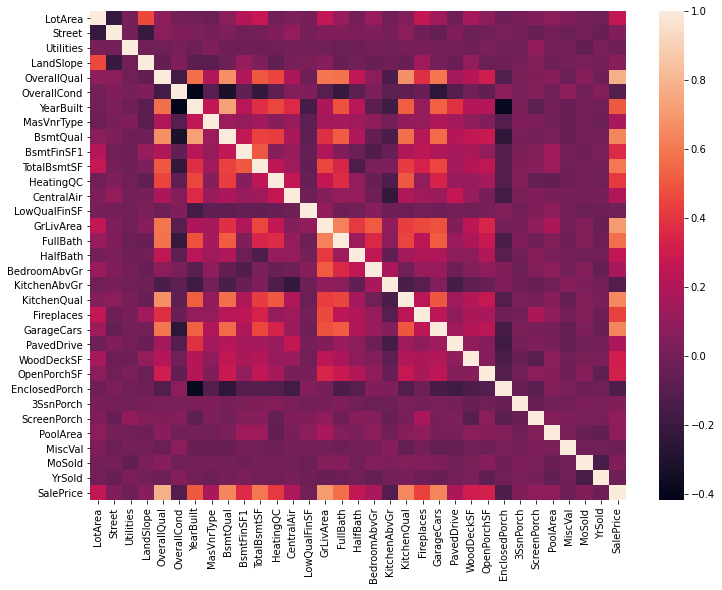

In [ ]:
corrmat = data_c.corr()
corrmat[corrmat>0.5]
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat);

In [ ]:
data_c

,MSZoning,LotArea,Street,LandContour,Utilities,LandSlope,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageType,GarageCars,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,RL,8450,1,Lvl,0,0,Norm,Norm,1Fam,2Story,7,5,2003,Gable,CompShg,VinylSd,VinylSd,1,PConc,3.0,TA,No,706,856,GasA,4,1,SBrkr,0,1710,2,1,3,1,2,Typ,0,Attchd,2,2,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,RL,9600,1,Lvl,0,0,Feedr,Norm,1Fam,1Story,6,8,1976,Gable,CompShg,MetalSd,MetalSd,0,CBlock,3.0,TA,Gd,978,1262,GasA,4,1,SBrkr,0,1262,2,0,3,1,1,Typ,1,Attchd,2,2,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,RL,11250,1,Lvl,0,0,Norm,Norm,1Fam,2Story,7,5,2001,Gable,CompShg,VinylSd,VinylSd,1,PConc,3.0,TA,Mn,486,920,GasA,4,1,SBrkr,0,1786,2,1,3,1,2,Typ,1,Attchd,2,2,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,RL,9550,1,Lvl,0,0,Norm,Norm,1Fam,2Story,7,5,1915,Gable,CompShg,Wd Sdng,Wd Shng,0,BrkTil,2.0,Gd,No,216,756,GasA,3,1,SBrkr,0,1717,1,0,3,1,2,Typ,1,Detchd,3,2,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,RL,14260,1,Lvl,0,0,Norm,Norm,1Fam,2Story,8,5,2000,Gable,CompShg,VinylSd,VinylSd,1,PConc,3.0,TA,Av,655,1145,GasA,4,1,SBrkr,0,2198,2,1,4,1,2,Typ,1,Attchd,3,2,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,7917,1,Lvl,0,0,Norm,Norm,1Fam,2Story,6,5,1999,Gable,CompShg,VinylSd,VinylSd,0,PConc,3.0,TA,No,0,953,GasA,4,1,SBrkr,0,1647,2,1,3,1,1,Typ,1,Attchd,2,2,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,RL,13175,1,Lvl,0,0,Norm,Norm,1Fam,1Story,6,6,1978,Gable,CompShg,Plywood,Plywood,0,CBlock,3.0,TA,No,790,1542,GasA,2,1,SBrkr,0,2073,2,0,3,1,1,Min1,2,Attchd,2,2,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,RL,9042,1,Lvl,0,0,Norm,Norm,1Fam,2Story,7,9,1941,Gable,CompShg,CemntBd,CmentBd,0,Stone,2.0,Gd,No,275,1152,GasA,4,1,SBrkr,0,2340,2,0,4,1,2,Typ,2,Attchd,1,2,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,RL,9717,1,Lvl,0,0,Norm,Norm,1Fam,1Story,5,6,1950,Hip,CompShg,MetalSd,MetalSd,0,CBlock,2.0,TA,Mn,49,1078,GasA,3,1,FuseA,0,1078,1,0,2,1,2,Typ,0,Attchd,1,2,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


In [ ]:
data2=data_c
data3=pd.get_dummies(data2[['SaleCondition','HouseStyle']],drop_first=True)
data2=data2.join(data3)
data2.drop(['SaleCondition','HouseStyle'],axis=1,inplace=True)

In [ ]:
data_cat=data2.select_dtypes(include='object')
data_cat

,MSZoning,LandContour,Condition1,Condition2,BldgType,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,Foundation,BsmtCond,BsmtExposure,Heating,Electrical,Functional,GarageType,SaleType
0,RL,Lvl,Norm,Norm,1Fam,Gable,CompShg,VinylSd,VinylSd,PConc,TA,No,GasA,SBrkr,Typ,Attchd,WD
1,RL,Lvl,Feedr,Norm,1Fam,Gable,CompShg,MetalSd,MetalSd,CBlock,TA,Gd,GasA,SBrkr,Typ,Attchd,WD
2,RL,Lvl,Norm,Norm,1Fam,Gable,CompShg,VinylSd,VinylSd,PConc,TA,Mn,GasA,SBrkr,Typ,Attchd,WD
3,RL,Lvl,Norm,Norm,1Fam,Gable,CompShg,Wd Sdng,Wd Shng,BrkTil,Gd,No,GasA,SBrkr,Typ,Detchd,WD
4,RL,Lvl,Norm,Norm,1Fam,Gable,CompShg,VinylSd,VinylSd,PConc,TA,Av,GasA,SBrkr,Typ,Attchd,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Lvl,Norm,Norm,1Fam,Gable,CompShg,VinylSd,VinylSd,PConc,TA,No,GasA,SBrkr,Typ,Attchd,WD
1456,RL,Lvl,Norm,Norm,1Fam,Gable,CompShg,Plywood,Plywood,CBlock,TA,No,GasA,SBrkr,Min1,Attchd,WD
1457,RL,Lvl,Norm,Norm,1Fam,Gable,CompShg,CemntBd,CmentBd,Stone,Gd,No,GasA,SBrkr,Typ,Attchd,WD
1458,RL,Lvl,Norm,Norm,1Fam,Hip,CompShg,MetalSd,MetalSd,CBlock,TA,Mn,GasA,FuseA,Typ,Attchd,WD


In [ ]:
data_final=data2.select_dtypes(exclude='object')

In [ ]:
data_final['log_GrV']=np.log(data_final['GrLivArea'])
data_final['log_price']=np.log(data_final['SalePrice'])
data_final['log_LtAr']=np.log(data_final['LotArea'])
data_final.drop(['3SsnPorch','BsmtQual','EnclosedPorch','HouseStyle_2.5Fin','ScreenPorch','PoolArea','MiscVal'],axis=1,inplace=True)
data_final.drop(['HouseStyle_1Story','GrLivArea','LotArea'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
#data_final.profile_report()

In [ ]:
X=data_final.drop(['SalePrice','log_price'],axis=1)
y=data_final['log_price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=36)

In [ ]:
X

,Street,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,MasVnrType,BsmtFinSF1,TotalBsmtSF,HeatingQC,CentralAir,LowQualFinSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageCars,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,HouseStyle_1.5Unf,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,log_GrV,log_LtAr
0,1,0,0,7,5,2003,1,706,856,4,1,0,2,1,3,1,2,0,2,2,0,61,2,2008,0,0,0,1,0,0,0,1,0,0,7.444249,9.041922
1,1,0,0,6,8,1976,0,978,1262,4,1,0,2,0,3,1,1,1,2,2,298,0,5,2007,0,0,0,1,0,0,0,0,0,0,7.140453,9.169518
2,1,0,0,7,5,2001,1,486,920,4,1,0,2,1,3,1,2,1,2,2,0,42,9,2008,0,0,0,1,0,0,0,1,0,0,7.487734,9.328123
3,1,0,0,7,5,1915,0,216,756,3,1,0,1,0,3,1,2,1,3,2,0,35,2,2006,0,0,0,0,0,0,0,1,0,0,7.448334,9.164296
4,1,0,0,8,5,2000,1,655,1145,4,1,0,2,1,4,1,2,1,3,2,192,84,12,2008,0,0,0,1,0,0,0,1,0,0,7.695303,9.565214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,0,0,6,5,1999,0,0,953,4,1,0,2,1,3,1,1,1,2,2,0,40,8,2007,0,0,0,1,0,0,0,1,0,0,7.406711,8.976768
1456,1,0,0,6,6,1978,0,790,1542,2,1,0,2,0,3,1,1,2,2,2,349,0,2,2010,0,0,0,1,0,0,0,0,0,0,7.636752,9.486076
1457,1,0,0,7,9,1941,0,275,1152,4,1,0,2,0,4,1,2,2,1,2,0,60,5,2010,0,0,0,1,0,0,0,1,0,0,7.757906,9.109636
1458,1,0,0,5,6,1950,0,49,1078,3,1,0,1,0,2,1,2,0,1,2,366,0,4,2010,0,0,0,1,0,0,0,0,0,0,6.982863,9.181632


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor


linmodel=LinearRegression()
randmodel=RandomForestRegressor()
svmodel=SVR()
xgbmodel=XGBRegressor()

In [ ]:
linmodel.fit(X,y)
randmodel.fit(X,y)
svmodel.fit(X,y)
xgbmodel.fit(X,y)

[12:50:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test1.csv')

In [ ]:
test=test.drop('Unnamed: 0',axis=1)
test

,Id,Street,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,MasVnrType,BsmtFinSF1,TotalBsmtSF,HeatingQC,CentralAir,LowQualFinSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageCars,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,HouseStyle_1.5Unf,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,log_GrV,log_LtAr
0,1461,1,1,0,5,6,1961,0,468.0,882.0,2,1,0,1,0,2,1,1.0,0,1.0,2,140,0,6,2010,0,0,0,1,0,0,0,0,0,0,6.797940,9.360655
1,1462,1,1,0,6,6,1958,1,923.0,1329.0,2,1,0,1,1,3,1,2.0,0,1.0,2,393,36,6,2010,0,0,0,1,0,0,0,0,0,0,7.192182,9.565704
2,1463,1,1,0,5,5,1997,0,791.0,928.0,3,1,0,2,1,3,1,1.0,1,2.0,2,212,34,3,2010,0,0,0,1,0,0,0,1,0,0,7.395722,9.534595
3,1464,1,1,0,6,6,1998,1,602.0,926.0,4,1,0,2,1,3,1,2.0,1,2.0,2,360,36,6,2010,0,0,0,1,0,0,0,1,0,0,7.380256,9.208138
4,1465,1,1,0,8,5,1992,0,263.0,1280.0,4,1,0,2,0,2,1,2.0,0,2.0,2,0,82,1,2010,0,0,0,1,0,0,0,0,0,0,7.154615,8.518193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,1,1,0,4,7,1970,0,0.0,546.0,3,1,0,1,1,3,1,1.0,0,0.0,2,0,0,6,2006,0,0,0,1,0,0,0,1,0,0,6.995766,7.568379
1455,2916,1,1,0,4,5,1970,0,252.0,546.0,2,1,0,1,1,3,1,1.0,0,1.0,2,0,24,4,2006,0,0,0,0,0,0,0,1,0,0,6.995766,7.546446
1456,2917,1,1,0,5,7,1960,0,1224.0,1224.0,4,1,0,1,0,4,1,1.0,1,2.0,2,474,0,9,2006,0,0,0,0,0,0,0,0,0,0,7.109879,9.903488
1457,2918,1,1,0,5,5,1992,0,337.0,912.0,2,1,0,1,0,3,1,1.0,0,0.0,2,80,32,7,2006,0,0,0,1,0,0,0,0,1,0,6.877296,9.253496


In [ ]:
Id=test.Id
tes=test.drop('Id',axis=1)
col=pd.DataFrame(X.columns,columns=['actual'])
col['test']=tes.columns
col

,actual,test
0,Street,Street
1,Utilities,Utilities
2,LandSlope,LandSlope
3,OverallQual,OverallQual
4,OverallCond,OverallCond
5,YearBuilt,YearBuilt
6,MasVnrType,MasVnrType
7,BsmtFinSF1,BsmtFinSF1
8,TotalBsmtSF,TotalBsmtSF
9,HeatingQC,HeatingQC


In [ ]:
liny=linmodel.predict(tes)
randy=randmodel.predict(tes)
svy=svmodel.predict(tes)
xgby=xgbmodel.predict(tes)

In [ ]:
df=pd.DataFrame(liny)
#df['liny']=liny
df['randy']=randy
df['svy']=svy
df['xgby']=xgby
out=pd.DataFrame(np.exp(liny),columns=['Price'])
out['Id']=Id
out.to_csv('/content/drive/MyDrive/Colab Notebooks/Submissions.csv')

In [ ]:
from sklearn.metrics import mean_squared_error
for i in df.loc[:,'liny':].columns:
    print(i,np.sqrt(mean_squared_error(np.log(np.exp(df['log_price'])),np.log(np.exp(df[i])))))

In [ ]:
X.shape